# Redes complexas

In [1]:
import networkx as nx
G = nx.Graph()

### Read nodes (and attach subtitle cluster info)

In [2]:
import pandas as pd

videoClusters = pd.read_csv("clustering.csv", index_col=0, header=None, squeeze=True).to_dict()

for id, value in videoClusters.items():
    G.add_node(id, cluster=value)

### Read data

In [3]:
import json
from glob import glob

data = glob("../relatedVideos/**/*")

for f in data:
    with open(f) as file:
        sourceVideo = f.split("/")[-1].split(".")[-0]
        relatedVideos = json.loads(file.read())["items"]
        for related in relatedVideos:
            videoId = related["id"]["videoId"]
            if G.has_node(videoId):
                G.add_edge(sourceVideo, videoId)

### Read related videos

In [4]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 812
Number of edges: 1006
Average degree:   2.4778


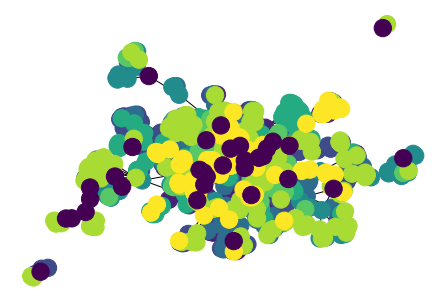

In [5]:
import matplotlib.pyplot as plt

values = [videoClusters.get(node, 0.25) for node in G.nodes()]
nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=False)
plt.show()

#### Assortativity in terms of cluster (Pearson correlation coefficient ) [doc](https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.assortativity.attribute_assortativity_coefficient.html#id2)

Preference for a network's nodes to attach to others that are similar in some way. Positive values of r indicate a correlation between nodes of similar degree, while negative values indicate relationships between nodes of different degree.

In [6]:
print(nx.attribute_assortativity_coefficient(G,'cluster'))

0.38616204361976736
